In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
data = pd.read_csv('adult.csv')
print(data.shape)
data.count()[1]

(32561, 15)


32561

In [2]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
def cc(x):
    return sum(x=='?')
data.apply(cc)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [4]:
data.loc[data.workclass == '?'].apply(cc)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1836
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country      27
income               0
dtype: int64

In [5]:
data.groupby(by='workclass')['hours.per.week'].mean()


workclass
?                   31.919390
Federal-gov         41.379167
Local-gov           40.982800
Never-worked        28.428571
Private             40.267096
Self-emp-inc        48.818100
Self-emp-not-inc    44.421881
State-gov           39.031587
Without-pay         32.714286
Name: hours.per.week, dtype: float64

In [6]:
df = data[data.occupation !='?']


In [7]:
df.loc[df['native.country']!='United-States','native.country'] = 'non_usa'


/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
for i in df.columns:
    if type(df[i][1])== str:
        print(df[i].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Name: workclass, dtype: int64
HS-grad         9968
Some-college    6775
Bachelors       5182
Masters         1675
Assoc-voc       1321
11th            1056
Assoc-acdm      1020
10th             831
7th-8th          573
Prof-school      558
9th              463
Doctorate        398
12th             393
5th-6th          303
1st-4th          156
Preschool         46
Name: education, dtype: int64
Married-civ-spouse       14339
Never-married             9912
Divorced                  4258
Separated                  959
Widowed                    840
Married-spouse-absent      389
Married-AF-spouse           21
Name: marital.status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-ins

In [9]:
df.columns


Index([u'age', u'workclass', u'fnlwgt', u'education', u'education.num',
       u'marital.status', u'occupation', u'relationship', u'race', u'sex',
       u'capital.gain', u'capital.loss', u'hours.per.week', u'native.country',
       u'income'],
      dtype='object')

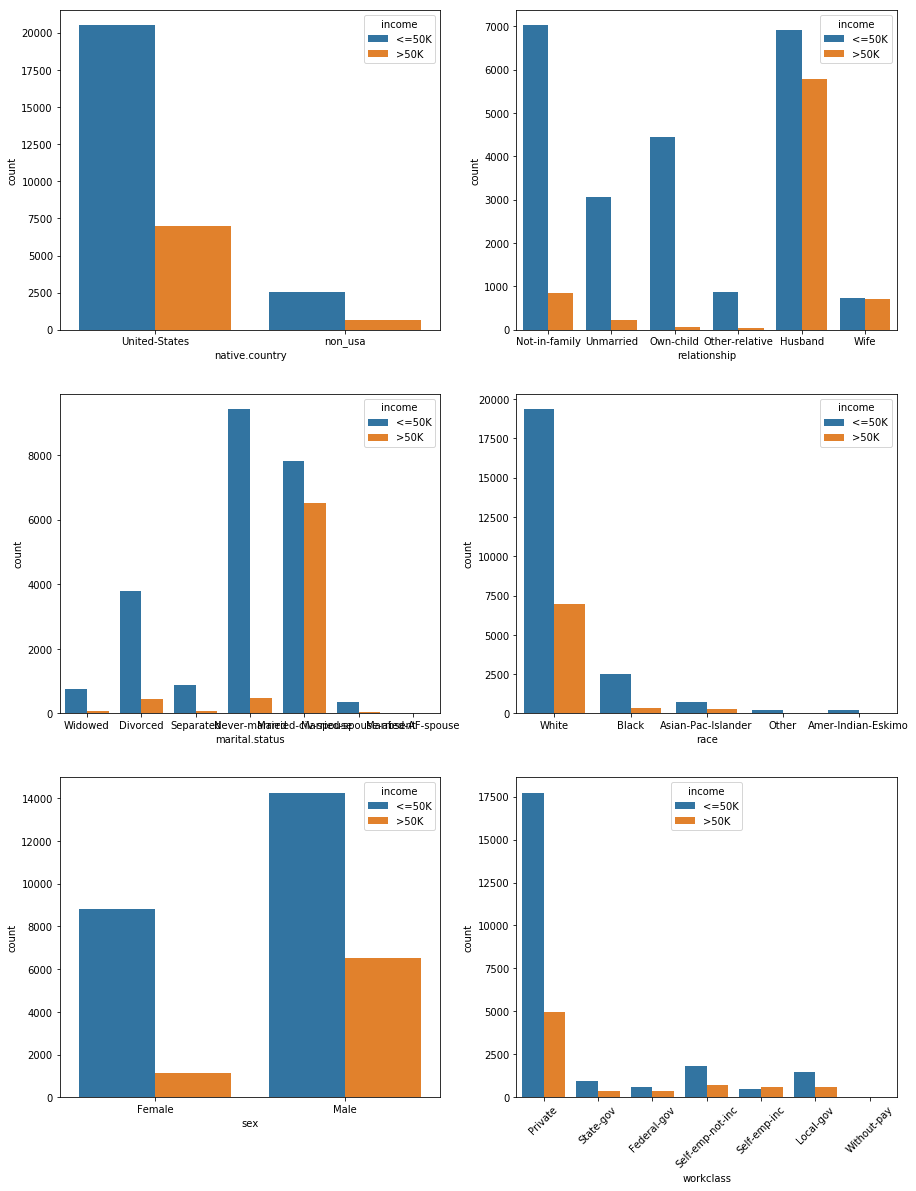

In [10]:
import seaborn as sns
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(15,20))
plt.xticks(rotation=45)
sns.countplot(df['workclass'],hue=df['income'],ax=f)
sns.countplot(df['relationship'],hue=df['income'],ax=b)
sns.countplot(df['marital.status'],hue=df['income'],ax=c)
sns.countplot(df['race'],hue=df['income'],ax=d)
sns.countplot(df['sex'],hue=df['income'],ax=e)
sns.countplot(df['native.country'],hue=df['income'],ax=a)

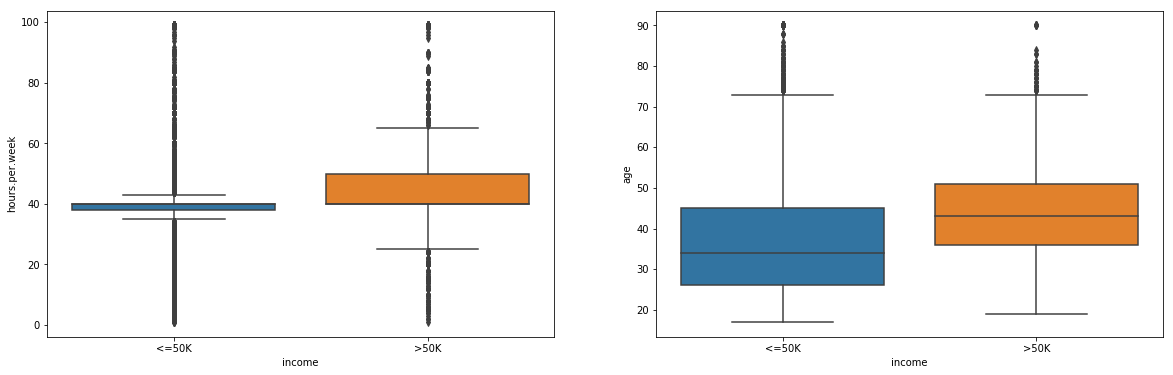

In [11]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='hours.per.week',x='income',data=df,ax=a)
sns.boxplot(y='age',x='income',data=df,ax=b)

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
df_backup =df


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.columns:
    df[i]=le.fit_transform(df[i])

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [15]:
import random
import sklearn
random.seed(100)
train,test = train_test_split(df,test_size=0.2)

In [16]:
l=pd.DataFrame(test['income'])
l['baseline'] =0
k = pd.DataFrame(sklearn.metrics.confusion_matrix(test['income'],l['baseline']))
print(k)
(k[0][0]+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])

      0  1
0  4575  0
1  1569  0


0

In [17]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
x=train.drop('income',axis=1)
y=train['income']
clf.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
clf.score(x,y)


0.80609587368763735

In [19]:
pred = clf.predict(test.drop('income',axis=1))

In [20]:
import sklearn
k = pd.DataFrame(sklearn.metrics.confusion_matrix(test['income'],pred))
print(k)

      0    1
0  4272  303
1   946  623


In [21]:
(k[0][0]+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])

0

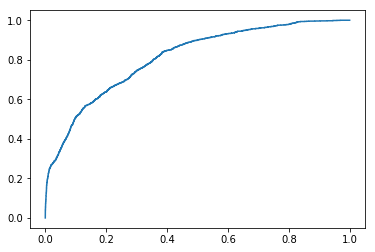

In [22]:
y_score = clf.fit(x,y).decision_function(test.drop('income',axis=1))

fpr,tpr,the=sklearn.metrics.roc_curve(test['income'],y_score)
sklearn.metrics.roc_auc_score(test['income'],pred)
plt.plot(fpr,tpr,)

In [23]:
sklearn.metrics.roc_auc_score(test['income'],y_score)

0.81058249485419342

In [24]:
col=['age','fnlwgt','capital.gain','capital.loss','hours.per.week','education','education.num','marital.status','relationship','sex']

<Container object of 14 artists>

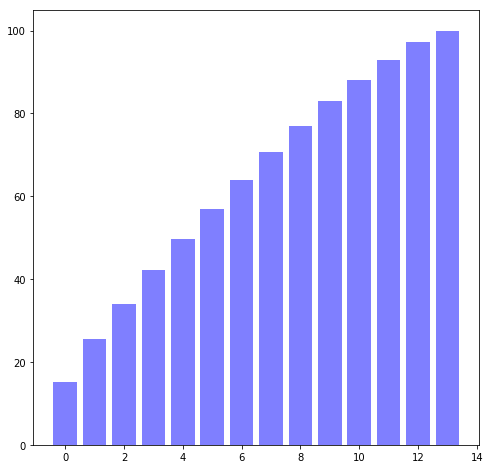

In [25]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(x)


from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=14)
Y_sklearn = sklearn_pca.fit_transform(X_std)

cum_sum = sklearn_pca.explained_variance_ratio_.cumsum()

sklearn_pca.explained_variance_ratio_[:10].sum()

cum_sum = cum_sum*100

fig, ax = plt.subplots(figsize=(8,8))
plt.bar(range(14), cum_sum, label='Cumulative _Sum_of_Explained _Varaince', color = 'b',alpha=0.5)


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
clf = DecisionTreeClassifier(max_features=14,min_samples_leaf=100,random_state=10)
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=14, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [28]:
pred2 = clf.predict(test.drop('income',axis=1))


In [29]:
k = pd.DataFrame(sklearn.metrics.confusion_matrix(test['income'],pred2))
print(k)

      0    1
0  4256  319
1   604  965


In [30]:
a = float(k[0][0])

In [31]:
a

4256.0

In [32]:
(a+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])

0.8497721354166666

In [33]:
from xgboost import XGBClassifier

clf= XGBClassifier()

clf.fit(x,y)

pred2 = clf.predict(test.drop('income',axis=1))

k = pd.DataFrame(sklearn.metrics.confusion_matrix(test['income'],pred2))

b = float(k[0][0])

(b+k[1][1])/(k[0][0]+k[1][1]+k[0][1]+k[1][0])

0.8566080729166666